# Feature Importance

In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import setting
from src.common import util
import pandas as pd
import seaborn as sns

In [23]:
df_train, df_test = util.load_data()

In [24]:
model = util.get_model("m001_hgbr")

In [25]:
from sklearn.model_selection import KFold
splitter = KFold(n_splits=5, random_state=0, shuffle=True)

In [26]:
from sklearn.inspection import permutation_importance

In [27]:

X_train_val = df_train.drop(columns=["target", "id"])
y_train_val = df_train["target"].values

X_test = df_test.drop(columns=["id"])

In [28]:
model.fit(X_train_val, y_train_val)

HistGradientBoostingRegressor(random_state=0)

In [29]:
def get_permutation_importance(model, X_val, y_val, n_repeats=30):
    r = permutation_importance(
        model,
        X_val,
        y_val,
        n_repeats=n_repeats
    )

    df_permutation_importance = pd.DataFrame(
        r["importances"].T, columns=model.feature_names_in_
    )
    df_permutation_importance = (
        df_permutation_importance.T.assign(mean=lambda df: df.mean(axis=1))
        .sort_values("mean", ascending=False)
        .drop(columns="mean")
        .T
    )
    return df_permutation_importance

In [30]:
df_permutation_importance = get_permutation_importance(model, X_train_val.iloc[:50, :], y_train_val[:50])
df_permutation_importance

,cont1,cont10,cont14,cont6,cont9,cont3,cont2,cont11,cont7,cont12,cont4,cont5,cont8,cont13
0,0.116260,0.071224,0.015763,0.024869,0.045612,0.009331,0.035626,0.017205,0.031106,-0.003558,-0.018000,0.001556,-0.010155,-0.007750
1,0.108833,0.009988,0.034876,0.036508,0.015050,0.035112,0.000050,0.007565,-0.029113,-0.017931,-0.029515,0.017873,0.015862,-0.009139
2,0.109984,0.012677,0.031811,0.037981,0.028257,0.028830,0.029253,0.025399,0.032545,0.024353,0.015029,0.005268,-0.011911,0.022624
3,0.125643,0.038906,0.051946,0.063007,0.041302,0.071641,-0.004964,0.054478,-0.001572,0.013951,0.015624,0.015380,-0.005776,-0.008224
4,0.089351,0.037116,0.052269,0.063572,0.033407,0.038961,0.010598,0.026975,0.010332,0.025365,-0.039607,0.011607,0.017141,-0.044239
5,0.066792,0.076729,0.039068,0.017180,0.037834,0.031697,0.024588,0.006498,0.014575,-0.000203,0.024450,0.003868,-0.003344,0.000749
6,0.098968,0.068029,0.018345,0.050836,0.037766,0.008705,0.026755,-0.012791,0.012041,0.026827,-0.005540,0.012234,-0.013232,-0.026974
7,0.073521,0.035022,0.038181,0.041883,0.016522,0.004675,0.043529,0.052653,0.037789,0.056018,0.041642,0.013107,-0.001251,-0.018018
8,0.092459,0.051889,0.031254,0.003680,0.030007,0.038777,0.037160,0.030517,-0.014854,-0.009525,0.059893,-0.001739,-0.015537,0.041466
9,0.154524,0.088820,0.021490,0.005876,0.061851,0.045708,0.008933,-0.019758,-0.022456,0.000746,0.037203,0.007597,0.001260,0.009576


In [31]:
def plot_permutation_importance(df_permutation_importance, path):

    g = sns.catplot(
        data=df_permutation_importance.melt(),
        y="variable",
        x="value",
        kind="box"
    )

    g.savefig(path)


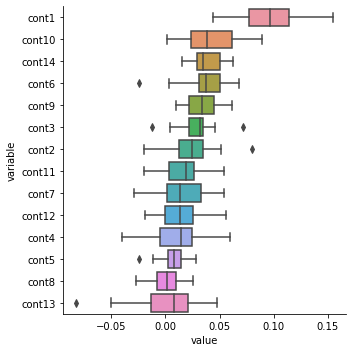

In [32]:
plot_permutation_importance(df_permutation_importance, "pi.svg")

In [33]:
from src.cv.oof import oof

In [34]:
df_oof, list_models, df_permutation_importance = oof(
    model,
    X_train_val,
    y_train_val,
    cv=splitter,
    return_permutation_importance =True
)

[OOF]: 100%|██████████| 5/5 [09:01<00:00, 108.29s/it]


In [36]:
df_permutation_importance.shape

(30, 70)

In [38]:
df_1 = pd.DataFrame({
    "a": [0, 1],
    "b": [2, 3]
})
df_2 = pd.DataFrame({
    "a": [0, 1],
    "b": [2, 3]
})

In [40]:
pd.concat([df_1, df_2], axis=0)

,a,b
0,0,2
1,1,3
0,0,2
1,1,3
